In [5]:
# use Avocado.csv
# use more than 1 algorithm (preferably 5)
# predict `Average Price`
# this is NOT  classification
# avocado prices in US, predict Average price
# can apply Simple imputer for missing values
# you need to deal with missing and categorical values
# bonus, if you can use a neural network (torch, keras etc)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [110]:
Avocado = pd.read_csv("Avocado.csv")

In [3]:
Avocado.head(5)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
print(Avocado.shape)

(18249, 14)


In [111]:
# let's drop "Unnamed: 0"
Avocado = Avocado.drop(['Unnamed: 0'], axis='columns')

In [6]:
Avocado.describe()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,18249.000000,1.824800e+04,1.824800e+04,1.824900e+04,1.824900e+04,1.824800e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506696e+05,2.930245e+05,2.951546e+05,2.283974e+04,2.396498e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453638e+06,1.265022e+06,1.204120e+06,1.074641e+05,9.862684e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083788e+04,8.544900e+02,3.008780e+03,0.000000e+00,5.087330e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073655e+05,8.646205e+03,2.906102e+04,1.849900e+02,3.974118e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.330098e+05,1.110289e+05,1.502069e+05,6.243420e+03,1.107849e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
# Missed value
Avocado.isnull().sum()

Date            0
AveragePrice    0
TotalVolume     1
4046            1
4225            0
4770            0
TotalBags       1
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [9]:
Avocado['type'].nunique()

2

In [10]:
Avocado['region'].nunique()

54

In [11]:
Avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [112]:
# Simple Imputer cannot use mean strategy with datatime:
Avocado['Date']=pd.to_datetime(Avocado['Date'])
Avocado['Month']=Avocado['Date'].apply(lambda x:x.month)
Avocado['Day']=Avocado['Date'].apply(lambda x:x.day)
Avocado = Avocado.drop(['Date'], axis='columns')
#Avocado.head(20)

In [113]:
Avocado.head(5)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [ ]:
# Simple Imputer cannot use mean strategy with non-numeric data:
# Let's convert categorical vaules using dummies method

In [114]:
Avocado_dummy_region = pd.get_dummies(Avocado['region'])
Avocado_dummy_region.head(10)

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
Avocado_dummy_type = pd.get_dummies(Avocado['type'])
Avocado_dummy_type.head(10)

,conventional,organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [116]:
newAvocado = pd.concat([Avocado, Avocado_dummy_type, Avocado_dummy_region], axis=1)
newAvocado = newAvocado.drop(['type', 'region'], axis='columns')
newAvocado.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,2015,...,0,0,0,0,0,0,0,0,0,0


In [117]:
from sklearn.impute import SimpleImputer  # Imputer is for missing values
my_imputer = SimpleImputer(strategy="mean")
AvocadoClean = pd.DataFrame(my_imputer.fit_transform(newAvocado))

In [118]:
y=AvocadoClean.iloc[:,0]

In [119]:
AvocadoClean.drop([0], axis='columns')

,1,2,3,4,5,6,7,8,9,10,...,58,59,60,61,62,63,64,65,66,67
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(AvocadoClean,y,test_size=0.2,random_state=2)

In [55]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('______')

In [56]:
import matplotlib.pyplot as plt

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr_pred = lr.predict(X_test)

In [86]:
print_evaluate(y_test, y_lr_pred)

MAE: 8.445552322724846e-09
MSE: 1.3615016615798317e-16
RMSE: 1.1668340334339892e-08
R2 Square 0.9999999999999991
______


Text(0.5, 1.0, 'The result of LinearRegression')

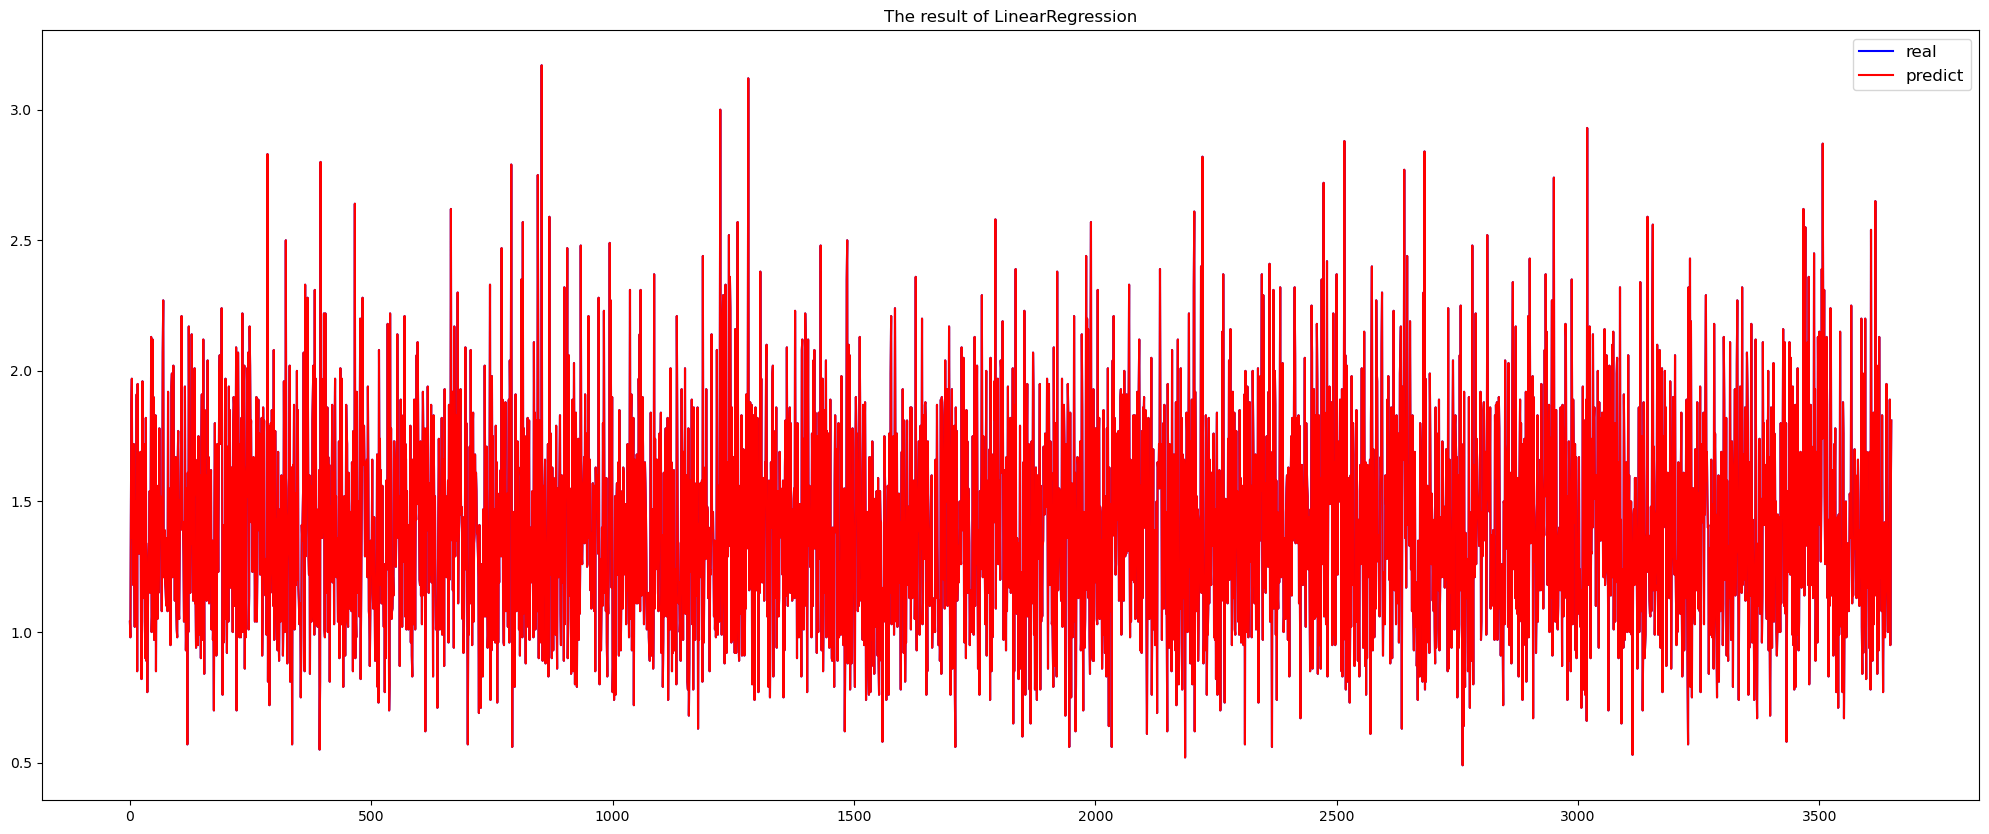

In [92]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:len(y_test)],c='blue')
plt.plot(y_lr_pred[:len(y_test)],c='red')
plt.annotate(
# Label and coordinate
'outlier!', xy=(50, 115), xytext=(20, 120),

# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of LinearRegression')

## Gradient Boosting Regressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_gbr_pred = gbr.predict(X_test)

In [93]:
print_evaluate(y_test, y_gbr_pred)

MAE: 0.0022267402781892777
MSE: 1.212426231036799e-05
RMSE: 0.0034819911416268693
R2 Square 0.9999236524076627
______


Text(0.5, 1.0, 'The result of LinearRegression')

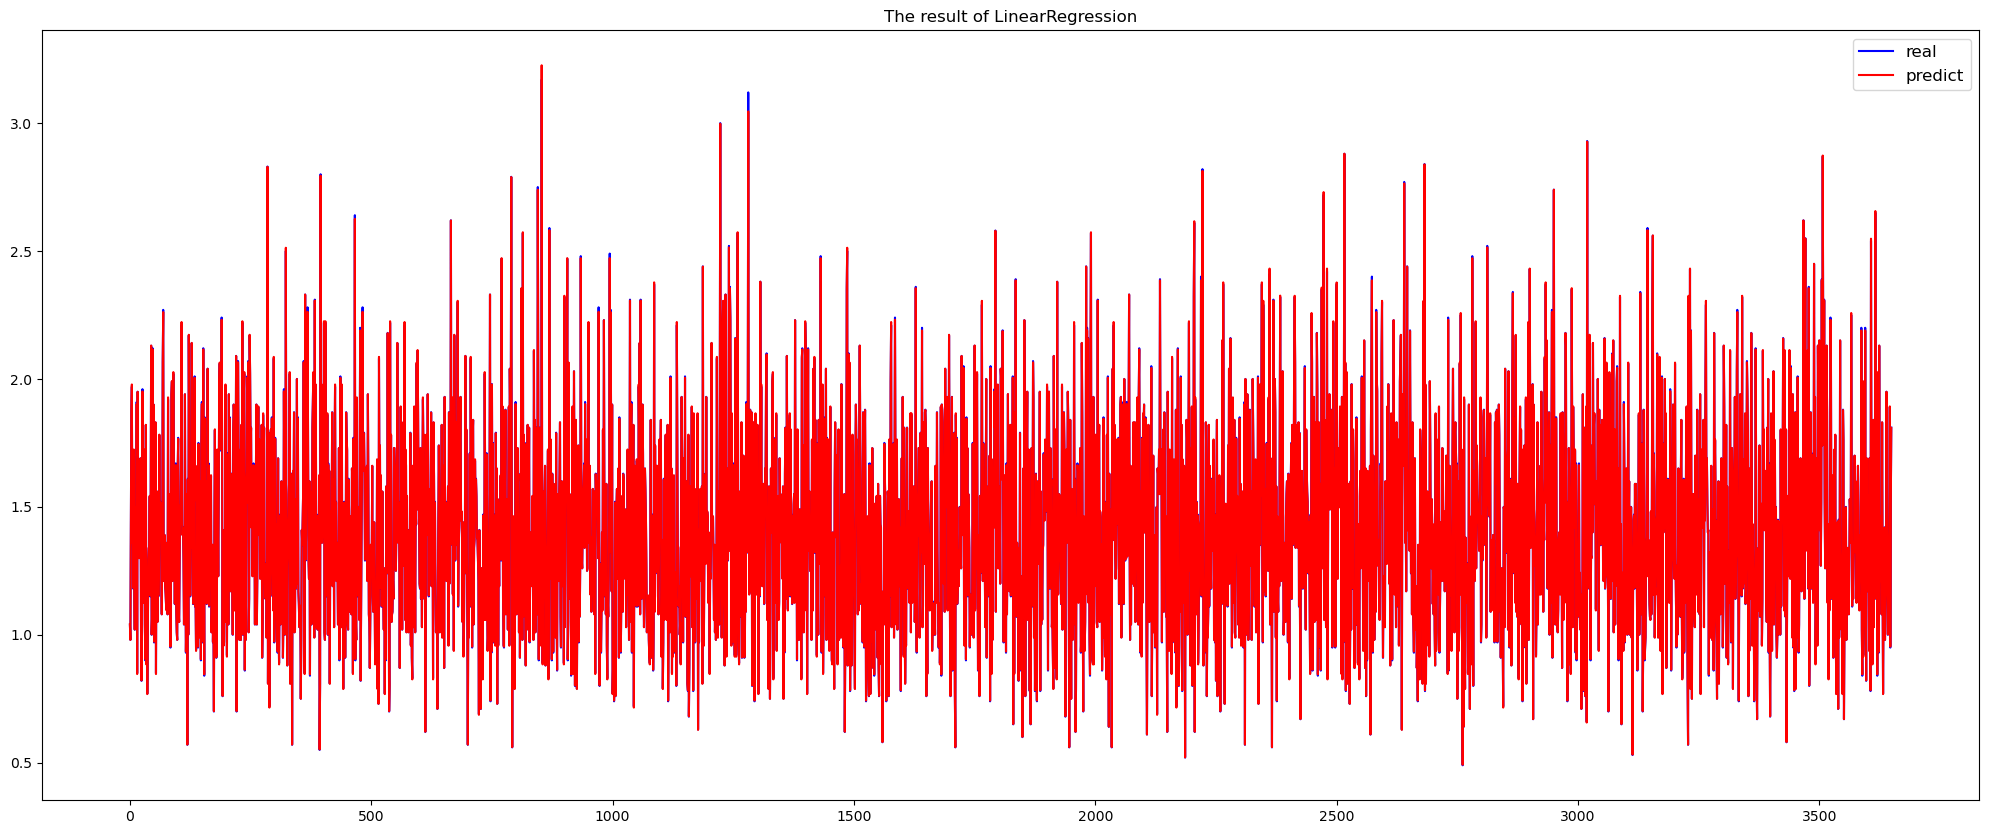

In [94]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:len(y_test)],c='blue')
plt.plot(y_gbr_pred[:len(y_test)],c='red')
plt.annotate(
# Label and coordinate
'outlier!', xy=(50, 115), xytext=(20, 120),

# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of LinearRegression')

## Random Forest Regressor 

In [63]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train, y_train)
y_rfr_pred = rfr.predict(X_test)

In [64]:
print_evaluate(y_test, y_rfr_pred)

MAE: 6.935342466611792e-05
MSE: 4.305532383562974e-06
RMSE: 0.0020749776826662434
R2 Square 0.9999728876674885
______


Text(0.5, 1.0, 'The result of RandomForestRegressor')

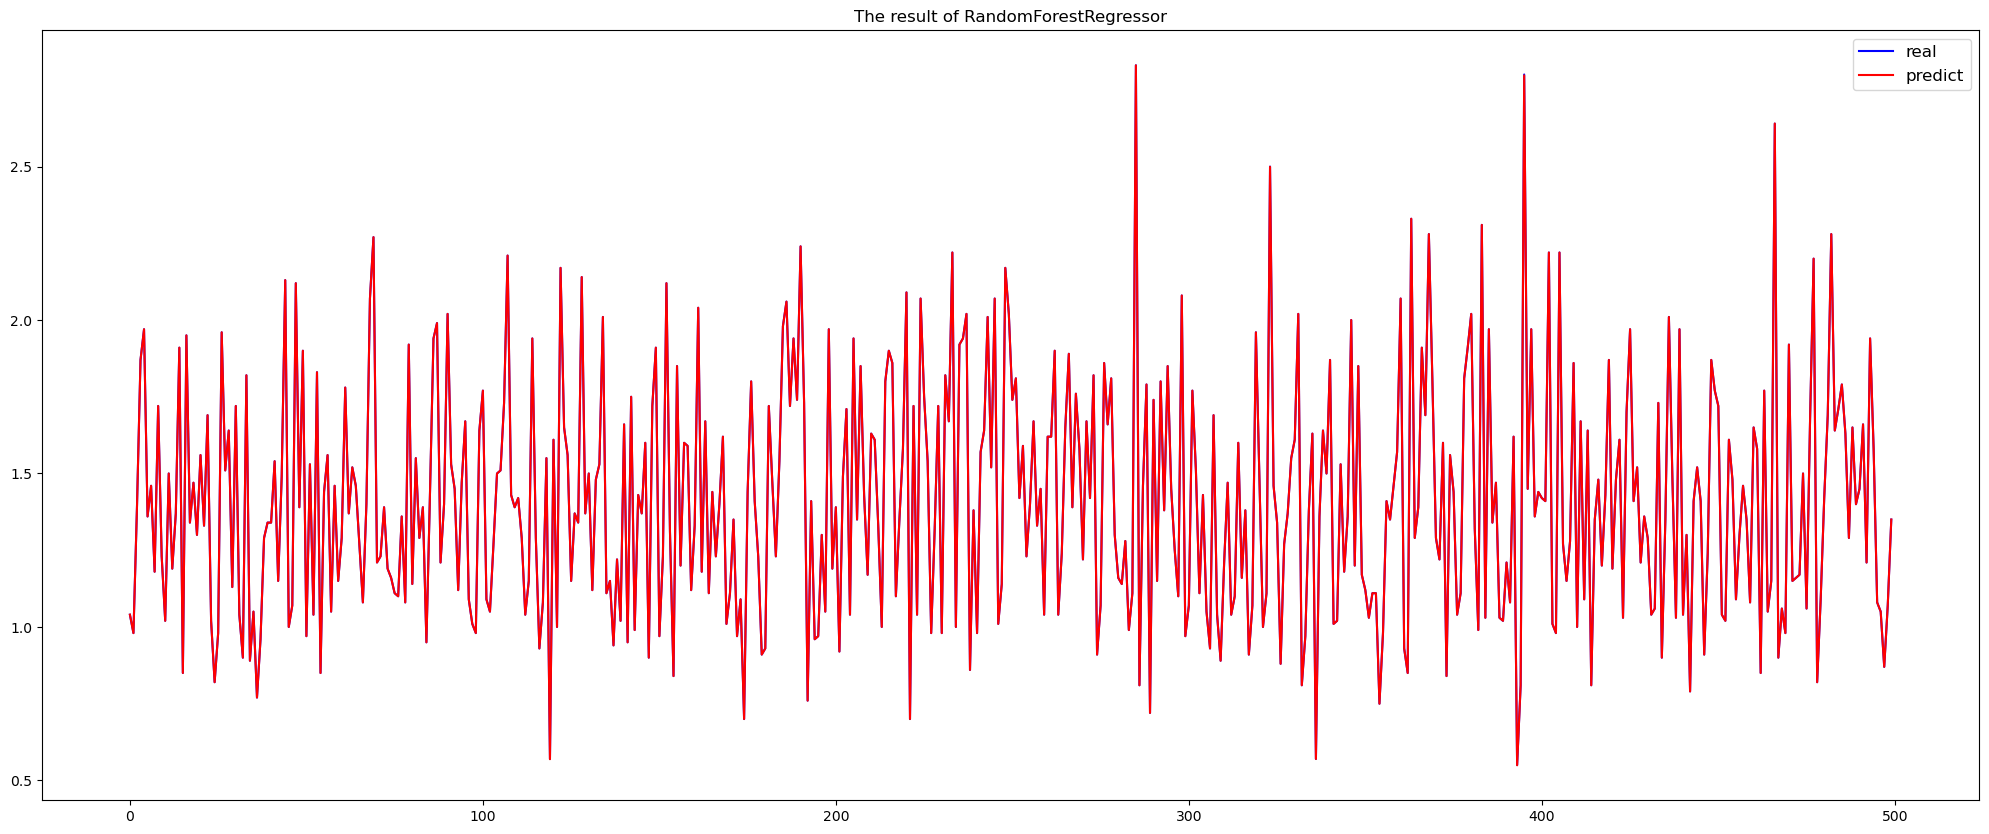

In [87]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:500],c='blue')
plt.plot(y_rfr_pred[:500],c='red')
plt.annotate(
# Label and coordinate
'outlier!', xy=(50, 115), xytext=(20, 120),

# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_mms_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_mms_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [84]:
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_mms_train,y_train)
rfr_y_predict = rfr.predict(X_mms_test)

In [98]:
print_evaluate(y_test, rfr_y_predict)

MAE: 6.900821918656822e-05
MSE: 4.247025315069829e-06
RMSE: 0.0020608312194524397
R2 Square 0.9999732560918676
______


Text(0.5, 1.0, 'The result of LinearRegression')

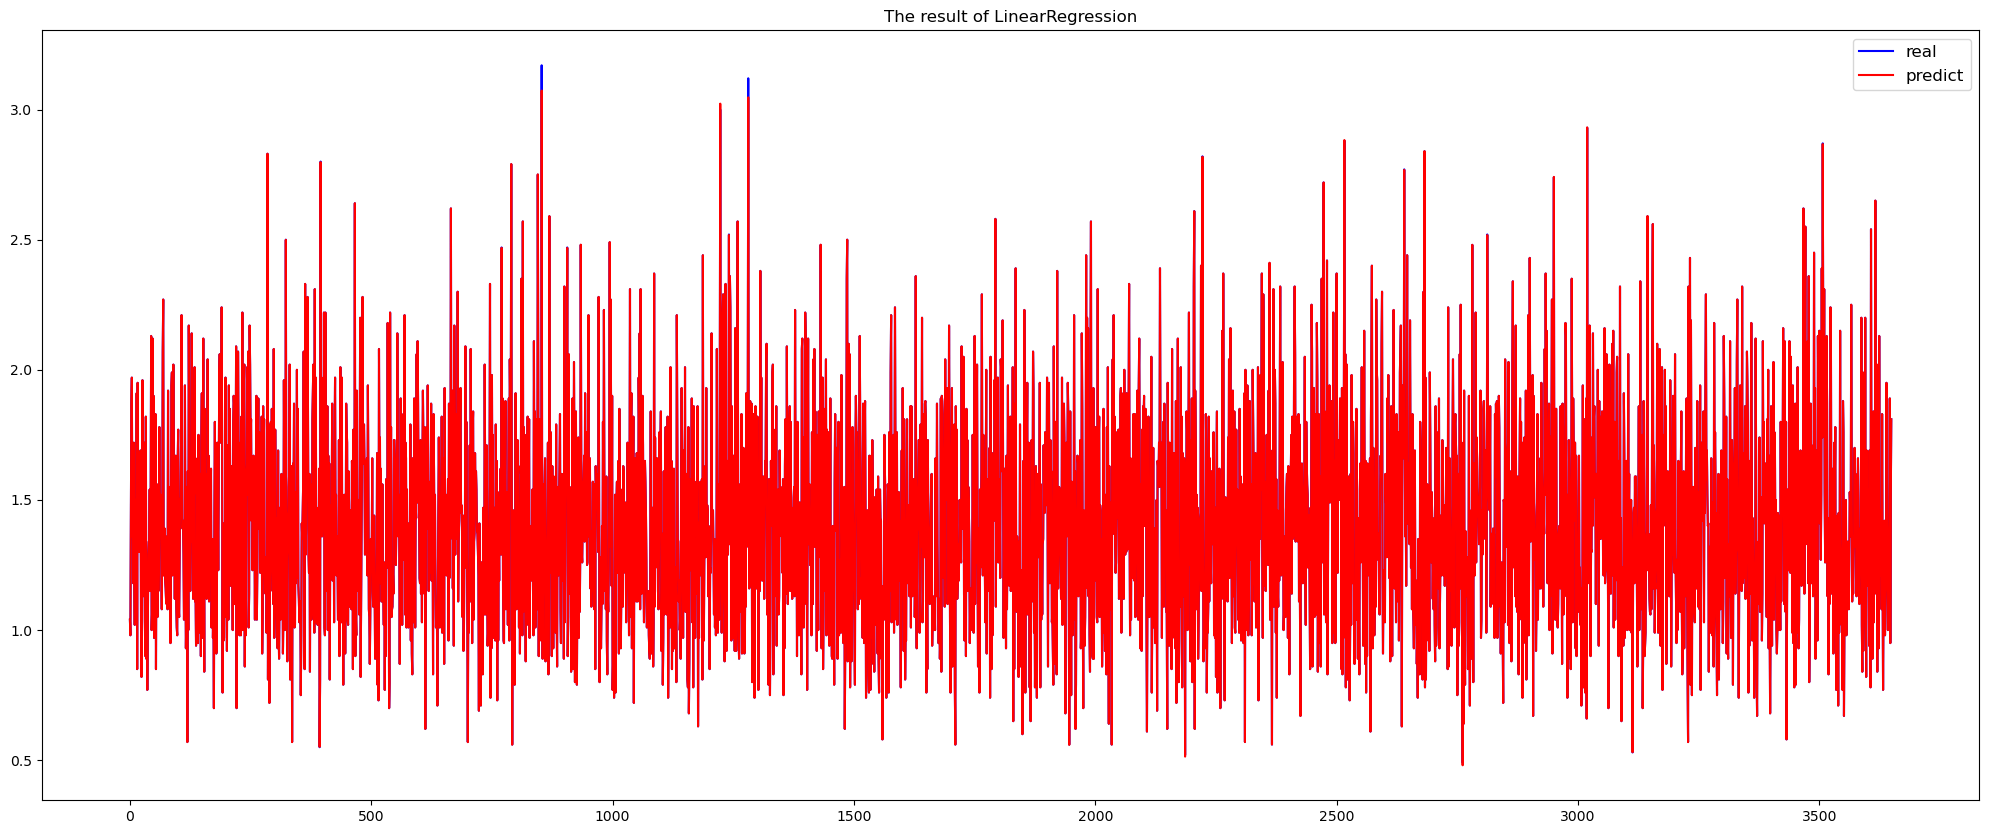

In [96]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:len(y_test)],c='blue')
plt.plot(rfr_y_predict[:len(y_test)],c='red')
plt.annotate(
# Label and coordinate
'outlier!', xy=(50, 115), xytext=(20, 120),

# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of LinearRegression')

## SVR

In [66]:
from sklearn.svm import SVR
svr = SVR(kernel ='rbf')
svr.fit(X_train, y_train)
y_svr_pred = rfr.predict(X_test)

In [99]:
print_evaluate(y_test, y_svr_pred)

MAE: 6.935342466611792e-05
MSE: 4.305532383562974e-06
RMSE: 0.0020749776826662434
R2 Square 0.9999728876674885
______


Text(0.5, 1.0, 'The result of LinearRegression')

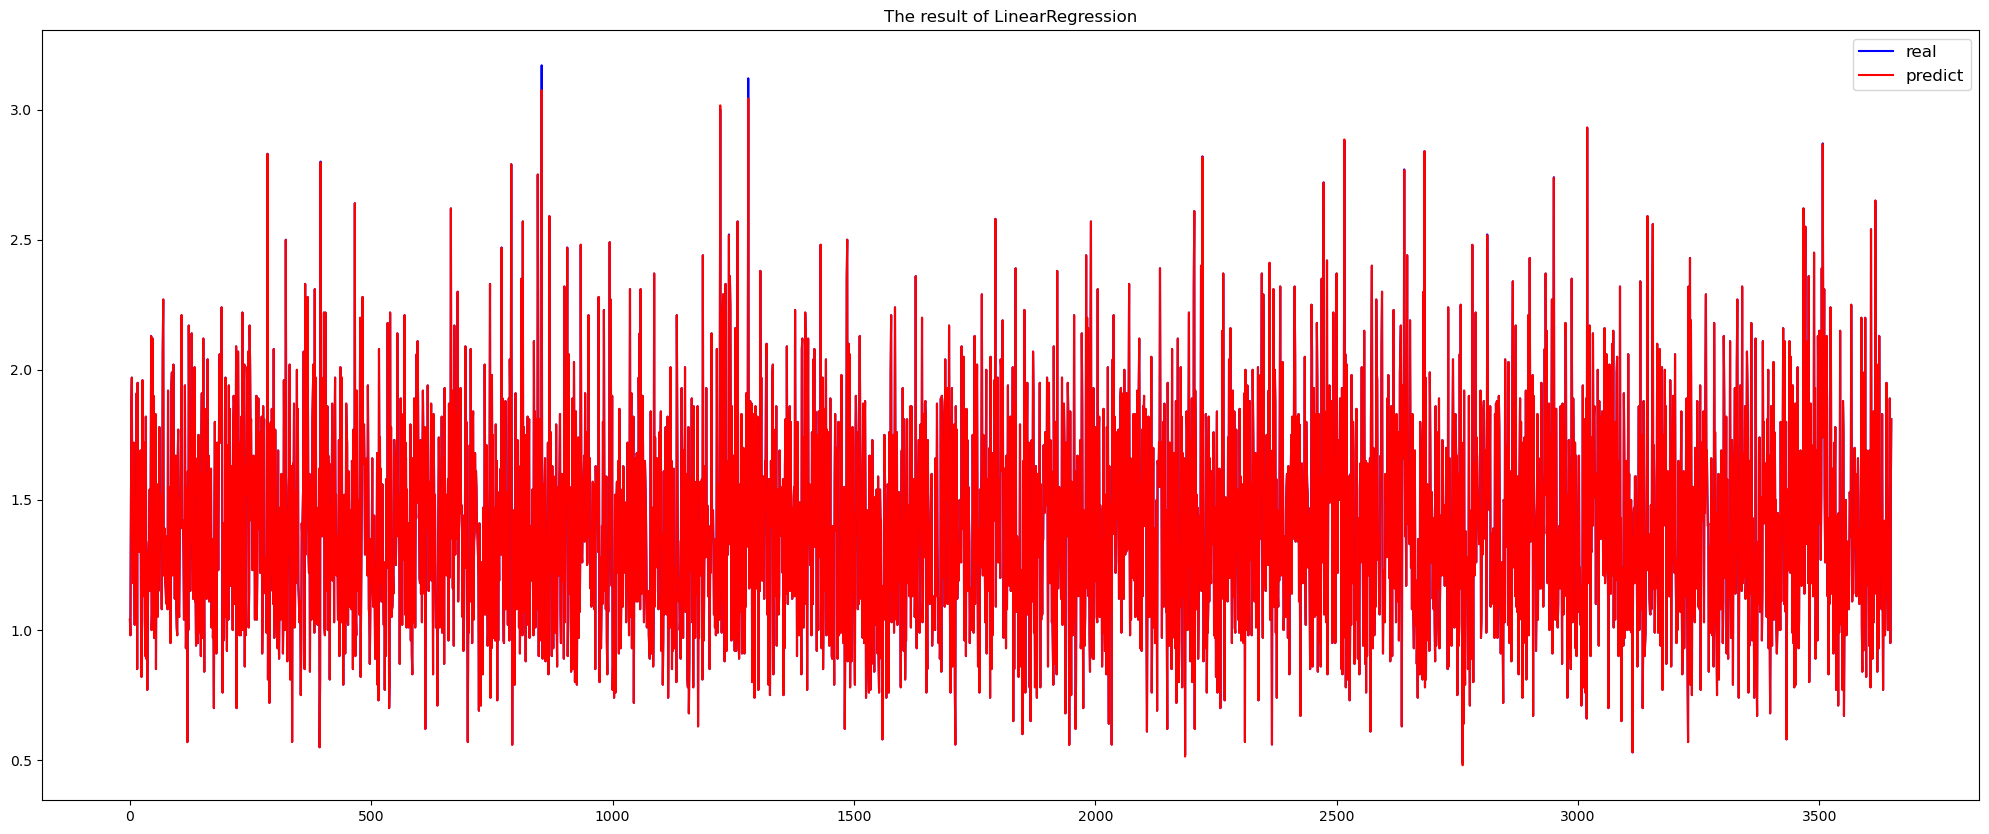

In [100]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:len(y_test)],c='blue')
plt.plot(y_svr_pred[:len(y_test)],c='red')
plt.annotate(
# Label and coordinate
'outlier!', xy=(50, 115), xytext=(20, 120),

# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of LinearRegression')